In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay,
                   sigmaz, tensor, thermal_dm)


%matplotlib inline
#%matplotlib qt5

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\qutip\__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [2]:
q = Qobj([[1], [0]])

q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [3]:
# Fundamental basis states (Fock states of oscillator modes)

N = 30  # number of states in the Hilbert space
n = 3  # the state that will be occupied

basis(N, n)  # equivalent to fock(N, n)

Quantum object: dims = [[30], [1]], shape = (30, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [4]:
# a coherent state
Alpha = coherent(N=3, alpha=1.0)
Alpha

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.61314782]
 [0.5698601 ]
 [0.5470916 ]]

In [5]:
# the position operator is easily constructed from the annihilation operator
a = destroy(3)

x = a + a.dag()

x

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.         1.         0.        ]
 [1.         0.         1.41421356]
 [0.         1.41421356 0.        ]]

In [6]:
expect(x, Alpha)

1.5806234411510864

In [7]:
a.eigenstates

<bound method Qobj.eigenstates of Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0.         1.         0.        ]
 [0.         0.         1.41421356]
 [0.         0.         0.        ]]>

In [8]:
a

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0.         1.         0.        ]
 [0.         0.         1.41421356]
 [0.         0.         0.        ]]

In [9]:
H = Qobj([[0, 1j+2],[1j-3*np.sqrt(2),0]])
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.        +0.j  2.        +1.j]
 [-4.24264069+1.j  0.        +0.j]]

In [10]:
psi0 = basis(2, 0)

In [11]:
tlist = np.linspace(0, 10, 100)

In [12]:
result = mesolve(H, psi0, tlist, [], [])
result

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

In [13]:
result.states[-1]  # the finial state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.51796492-0.26602458j]
 [ 0.102893  -0.80644671j]]

In [14]:
expect(sigmay(), result.states)

array([0.        , 0.70135818, 0.93851597, 0.96059155, 0.9404503 ,
       0.9209224 , 0.90790831, 0.90011776, 0.89565958, 0.89316675,
       0.89179217, 0.89104148, 0.89063459, 0.89041546, 0.89029814,
       0.89023568, 0.89020262, 0.89018521, 0.89017609, 0.89017135,
       0.8901689 , 0.89016764, 0.890167  , 0.89016667, 0.89016651,
       0.89016643, 0.89016639, 0.89016637, 0.89016636, 0.89016635,
       0.89016635, 0.89016635, 0.89016635, 0.89016635, 0.89016635,
       0.89016635, 0.89016635, 0.89016635, 0.89016635, 0.89016635,
       0.89016635, 0.89016635, 0.89016635, 0.89016635, 0.89016635,
       0.89016635, 0.89016635, 0.89016635, 0.89016635, 0.89016635,
       0.89016635, 0.89016635, 0.89016635, 0.89016635, 0.89016635,
       0.89016635, 0.89016635, 0.89016635, 0.89016635, 0.89016635,
       0.89016635, 0.89016635, 0.89016635, 0.89016635, 0.89016635,
       0.89016635, 0.89016635, 0.89016635, 0.89016635, 0.89016635,
       0.89016635, 0.89016635, 0.89016635, 0.89016635, 0.89016

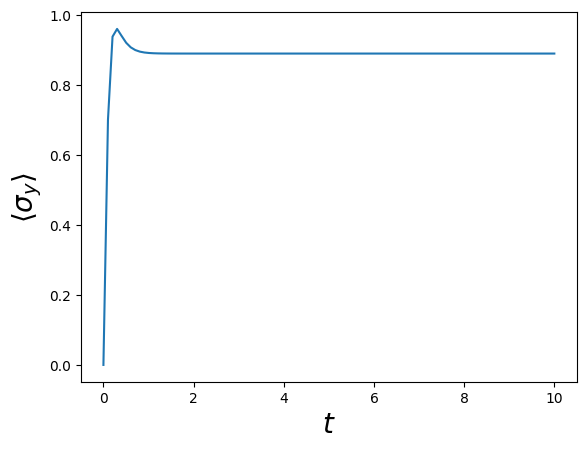

In [15]:
fig, axes = plt.subplots(1, 1)

axes.plot(tlist, expect(sigmay(), result.states))

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_y\right>$", fontsize=20);

------

In [16]:
w = 1
hbar = 1

H = Qobj([[-hbar*w/2,0],[0,hbar*w/2]])
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.5  0. ]
 [ 0.   0.5]]

In [17]:
psi0 = (basis(2, 0)+basis(2,1))*1/np.sqrt(2)
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [18]:
tlist = np.linspace(0, 10, 100)
result = mesolve(H, psi0, tlist, [], [])

In [19]:
sz = Qobj([[hbar/2,0],[0,-hbar/2]])

expect(sz, result.states)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

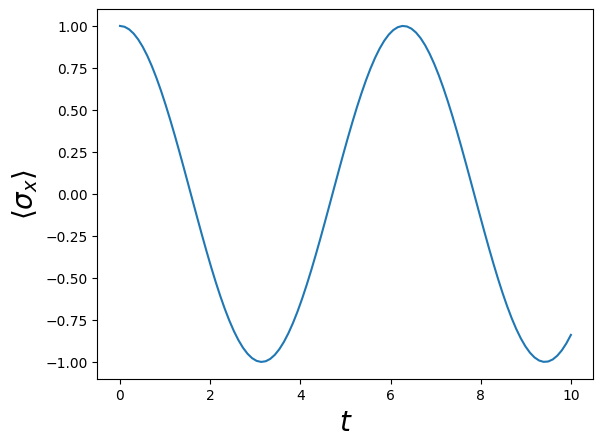

In [20]:
fig, axes = plt.subplots(1, 1)

axes.plot(tlist, expect(sigmax(), result.states))

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_x\right>$", fontsize=20);

-------

In [21]:
a = a = destroy(3)
x = (a.dag()+a)
xmoño = 1/np.sqrt(2)*(a+a.dag())
pmoño = 1/(np.sqrt(2)*1j)*(a-a.dag())

G0 = 1
wf = 1
F = G0

H1 = hbar*w/2*(xmoño**2+pmoño**2)
H2 = xmoño*F

H = H1+H2

In [22]:
psi0 = basis(3, 0)
Alpha = coherent(N=3, alpha=3.0j)
tlist = np.linspace(0, 10, 100)

result = mesolve(H, Alpha, tlist, [], [])

In [23]:
expect((x), result.states)

array([ 0.        , -0.06428801, -0.12229229, -0.17144391, -0.20985747,
       -0.23644587, -0.25098016, -0.25409067, -0.24720952, -0.23245855,
       -0.21249061, -0.19029515, -0.16898149, -0.15155469, -0.14069951,
       -0.13858709, -0.1467178 , -0.16581088, -0.19574827, -0.23557675,
       -0.28356805, -0.33733277, -0.39398021, -0.45031327, -0.50304489,
       -0.5490212 , -0.5854362 , -0.61002302, -0.62120889, -0.61822294,
       -0.60114962, -0.57092397, -0.52926907, -0.47857996, -0.42176189,
       -0.36203416, -0.30271276, -0.24698683, -0.19770428, -0.1571812 ,
       -0.12704811, -0.10814381, -0.10046385, -0.10316746, -0.11464234,
       -0.13262284, -0.15435375, -0.17678834, -0.19680704, -0.21144189,
       -0.21809129, -0.21471029, -0.19996336, -0.17332901, -0.13514897,
       -0.08661845, -0.02971784,  0.03290951,  0.09812544,  0.16249971,
        0.22253363,  0.27488952,  0.31661058,  0.34531609,  0.35935897,
        0.35793486,  0.34113542,  0.30994215,  0.26616135,  0.21

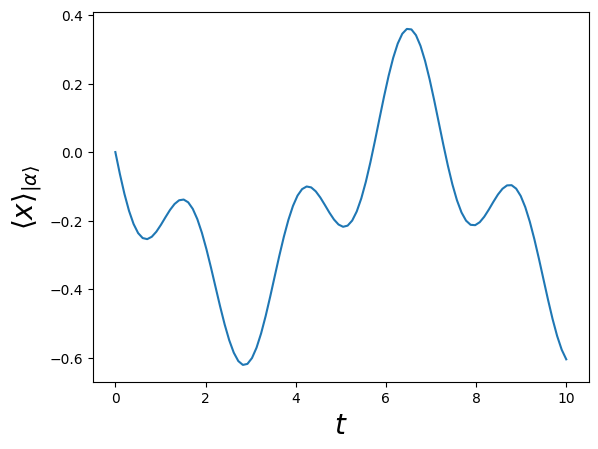

In [24]:
fig, axes = plt.subplots(1, 1)

axes.plot(tlist, expect(x, result.states))

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<x\right>_{|\alpha\rangle}$", fontsize=20);

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


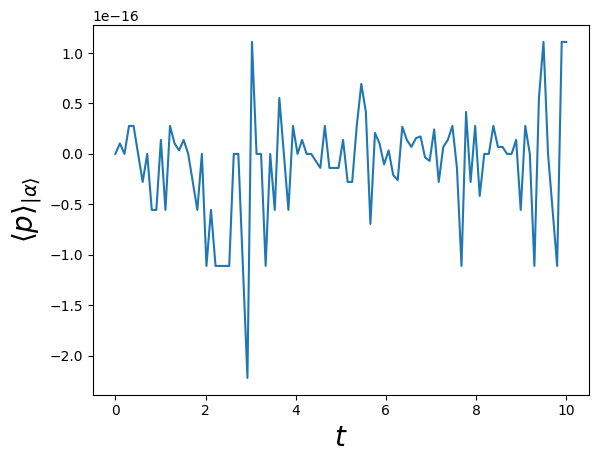

In [25]:
p = (a.dag()-a)

fig, axes = plt.subplots(1, 1)

axes.plot(tlist, expect(p, result.states))

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<p\right>_{|\alpha\rangle}$", fontsize=20);

------

In [26]:
excited = basis(2,0)
ground = basis(2,1)

operador = ground*excited.dag() #|g><e|


In [27]:
up = Qobj([[1],[0],[0]])
zero = Qobj([[0],[0],[0]])
down = Qobj([[0],[0],[1]])

In [28]:
sx = 1/np.sqrt(2)*Qobj([[0,1,0],[1,0,1],[0,1,0]])
sy = 1/np.sqrt(2)*Qobj([[0,-1j,0],[1j,0,-1j],[0,1j,0]])
sz =Qobj([[1,0,0],[0,0,0],[0,0,-1]])

lx = Qobj([[0,0,0],[0,0,1],[0,1,0]])

In [29]:
H = sz

In [30]:
psi0 = (basis(3, 0)+basis(3,1)+basis(3,2)).unit()
tlist = np.linspace(0, 10, 100)
result = mesolve(H, psi0, tlist, [], [])

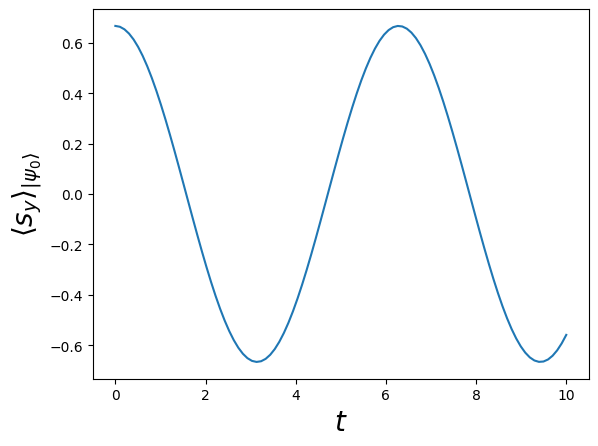

In [31]:
fig, axes = plt.subplots(1, 1)
axes.plot(tlist, expect(lx, result.states))
axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<s_y\right>_{|\psi_0\rangle}$", fontsize=20);

In [32]:
H = Qobj([[-w/2,0],[0,w/2]])
psi0 = 1/np.sqrt(2)*(basis(2,0)+basis(2,1))


In [33]:
up = basis(2,0)
down = basis(2,1)

spin_z = sigmaz()
spin_z = sigmax()

In [34]:
from qutip import *
import scipy as sy
from scipy import constants
import numpy as np
A = Qobj([[1,0,0,],[0,1,0],[0,1,1]])
B = Qobj([[2,7,5],[1,1,1],[0,1,0]])

commutator(A,B, kind = "anti")

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[ 4. 19. 10.]
 [ 2.  3.  2.]
 [ 1.  3.  1.]]

In [35]:
import cv2 
import numpy as np

In [36]:
def processImage(image):
    image = cv2.imread(image) 
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
    return image

In [37]:
def convolve2D(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel)) 


-------------

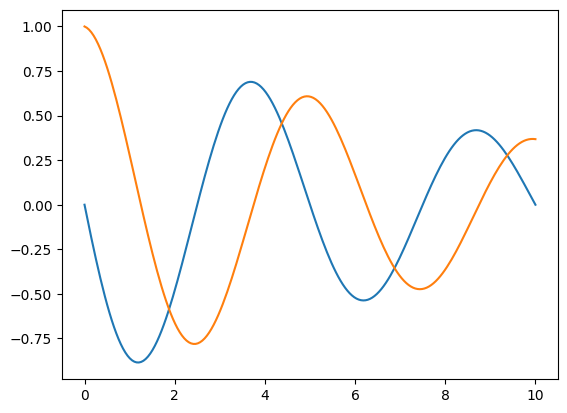

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

H = 2*np.pi*0.1*sigmax()
psi0 = basis(2,0)
times = np.linspace(0,10,200)
result = mesolve(H,psi0,times,[np.sqrt(0.05)*sigmax()],[sigmay(),sigmaz()])
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0])
ax.plot(result.times, result.expect[1])
plt.show()

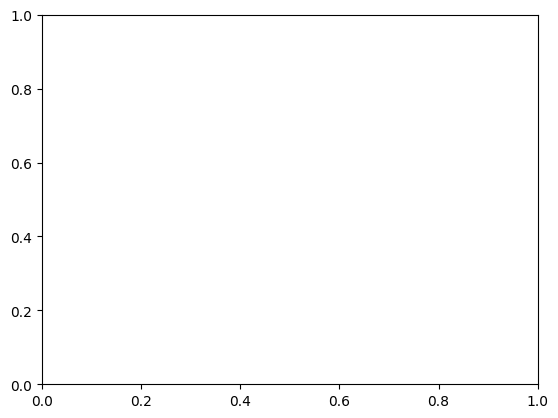

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

N = 2
a = destroy(N)
x = a.dag()+a
n = a.dag()*a

hbar = 1
w = 1

W = np.sqrt(0.05)*sigmax()
H =hbar*w*(a.dag()*a+1/2)+x  #Hamiltoniano del oscilador armónico
psi0 = basis(2,0)    #Estado inicial |0>
times = np.linspace(0,50,200)
result = mesolve(H,psi0,times,[W],[n])
fig, axes = plt.subplots(1, 1)
ax.plot(result.times, result.expect[0])
#ax.plot(result.times, result.expect[1])
plt.show()

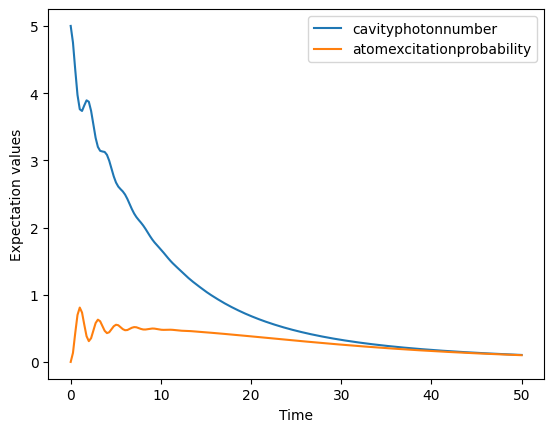

In [40]:
k = 1
wc = 1
wa = 1
psi0 = tensor(basis(2,0), basis(10,5))
a = tensor(qeye(2),destroy(10))
sm = tensor(destroy(2), qeye(10))
H = hbar*wa*(a.dag()*a+1/2)+hbar*wa*(sm.dag()*sm+1/2)+2*np.pi*k*(sm*a.dag()+sm.dag()*a)
result = mesolve(H, psi0, times, [np.sqrt(0.1)*a],[a.dag()*a,sm.dag()*sm])
plt.figure()
plt.plot(times, result.expect[0])
plt.plot(times, result.expect[1])
plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.legend(("cavityphotonnumber","atomexcitationprobability"))
plt.show()

In [41]:
sigmam()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]

In [42]:
import sympy as sp

x, y = sp.symbols('x y')
expr = x**4+2*x**3+x**2-2*x**2*y**2-2*y**2*x-2*x**2*y-2*x*y+y**4+2*y**3+y**2-2*x**2-2*x-2*y**2-2*y
factored_expr = sp.factor(expr)

print(factored_expr)


(x + y)*(x - y - 1)*(x - y + 1)*(x + y + 2)


<h1>Oscilador armónico</h1>

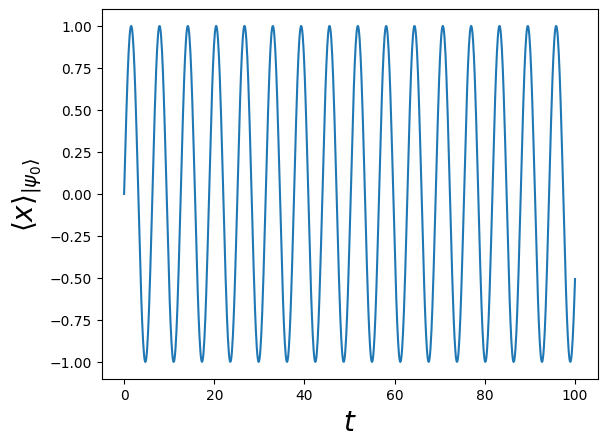

In [43]:
N = 2
a = destroy(N)
x = a.dag()+a
p = 1j*(-a.dag()+a)
w = 1
hbar = 1

H = hbar*w*(a.dag()*a+1/2)
psi0 = 1/np.sqrt(2)*(basis(2,0)+basis(2,1))

tlist = np.linspace(0, 100, 1000)
result = mesolve(H, psi0, tlist, [], [])


fig, axes = plt.subplots(1, 1)
#axes.plot(tlist, expect(x, result.states))
axes.plot(tlist, expect(p, result.states))
axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<x\right>_{|\psi_0\rangle}$", fontsize=20);

[]

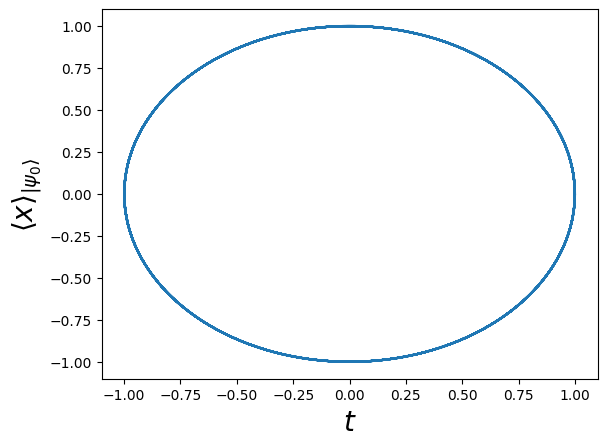

In [44]:
fig, axes = plt.subplots(1, 1)
axes.plot(expect(x, result.states),expect(p, result.states))
axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<x\right>_{|\psi_0\rangle}$", fontsize=20);plt.plot()

<h3>Oscilador armónico con algo externo</h3>

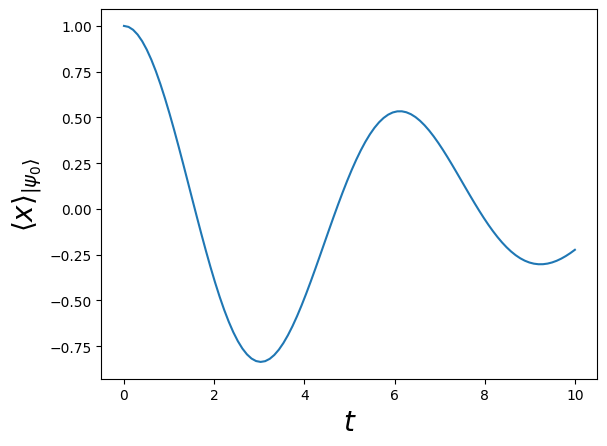

In [45]:
N = 2
a = destroy(N)
x = a.dag()+a
p = 1j*(a.dag()-a)
w = 1
hbar = 1


H1 = x*p    #Interacción, disipación, etc.
H = hbar*w*(a.dag()*a+1/2) + 0.1*H1
psi0 = 1/np.sqrt(2)*(basis(2,0)+basis(2,1))

tlist = np.linspace(0, 10, 100)
result = mesolve(H, psi0, tlist, [], [])

fig, axes = plt.subplots(1, 1)
axes.plot(tlist, expect(x, result.states))
#axes.plot(tlist, expect(p, result.states))*]
axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<x\right>_{|\psi_0\rangle}$", fontsize=20);

[]

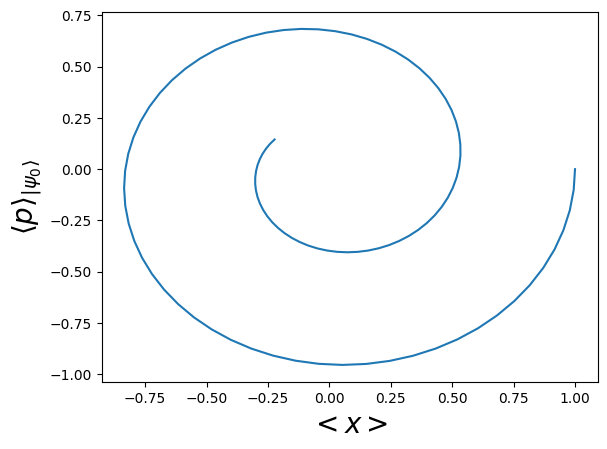

In [46]:
fig, axes = plt.subplots(1, 1)
axes.plot(expect(x, result.states),expect(p, result.states))
axes.set_xlabel(r"$<x>$", fontsize=20)
axes.set_ylabel(r"$\left<p\right>_{|\psi_0\rangle}$", fontsize=20);plt.plot()

<h1>Two-level atom coupled to a leaky single-mode cavity thorugh a dipole-type interaction</h1>

Tenemos un átomo de dos niveles de energía acoplado a un campo mono-modo a través de una interacción dipolar de la forma

$H_I = (\hat{a}\otimes \hat{I})\times \hat{a}^\dagger+ (\hat{a}^\dagger \otimes \hat{I})\times \hat{a}$

con pérdida energética. El estado inicial es $\ket{\Psi_0} = \ket{g} \otimes \ket{5}$.

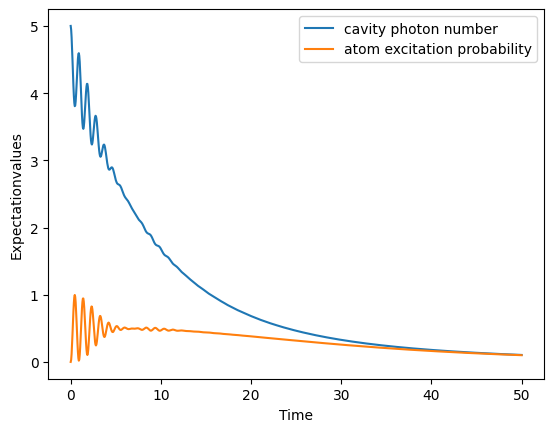

In [47]:
times = np.linspace(0,50,1000)
psi0 = tensor(fock(2,0), fock(10,5))
a =tensor(qeye(2),destroy(10))
sm=tensor(destroy(2),qeye(10))
H = 2*np.pi*a.dag()*a+2*np.pi*sm.dag()*sm+2*np.pi*0.25*(sm*a.dag()+sm.dag()*a)
result=mesolve(H,psi0,times,[np.sqrt(0.1)*a],[a.dag()*a,sm.dag()*sm])
plt.figure()
plt.plot(times,result.expect[0])
plt.plot(times,result.expect[1])
plt.xlabel('Time')
plt.ylabel('Expectationvalues')
plt.legend(("cavity photon number","atom excitation probability"))
plt.show()

---

In [48]:
Lx = hbar/np.sqrt(2)*Qobj([[0,1,0],[1,0,1],[0,1,0]])
state1 = fock(3,0)
state2 = fock(3,1)
state3 = fock(3,2)

Lx.eigenstates()

(array([-1.00000000e+00,  1.11022302e-15,  1.00000000e+00]),
 array([Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
        Qobj data =
        [[-0.5       ]
         [ 0.70710678]
         [-0.5       ]]                                              ,
        Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
        Qobj data =
        [[ 0.70710678]
         [ 0.        ]
         [-0.70710678]]                                              ,
        Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
        Qobj data =
        [[0.5       ]
         [0.70710678]
         [0.5       ]]                                               ],
       dtype=object))

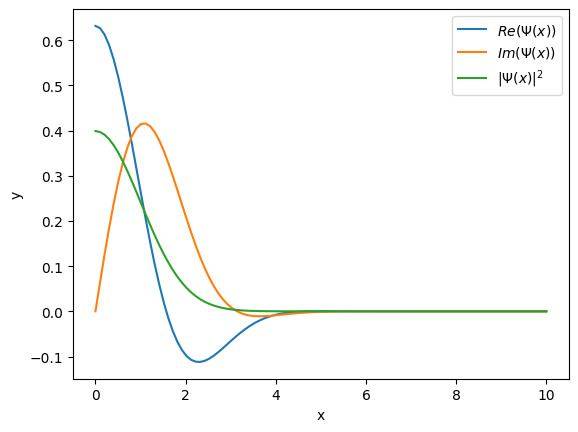

In [49]:
import numpy as np
import matplotlib.pyplot as plt

r = 1
sigma = 1
x = np.linspace(0,10,100)
psi = 1/(2*np.pi*sigma**2)**(1/4)*np.exp(-x**2/(4*sigma**2))*np.exp(1j*x/r)

# Create the plot
plt.plot(x, np.real(psi), label='$Re(\Psi(x))$')
plt.plot(x, np.imag(psi), label='$Im(\Psi(x))$')
plt.plot(x,np.abs(psi)**2, label = "$|\Psi(x)|^2$")
# Add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

---------

In [50]:
D = 10
estado = []

for k in range(0,D):
    estado.append(fock(D,k))

#Llamar estado[k] me devolverá el k-éstimo estado de Fock de dimensión D.

In [51]:
M1 = 2*estado[0]*estado[0].dag()+estado[1]*estado[1].dag()+2*1j*estado[1]*estado[2].dag()-2*1j*estado[2]*estado[1].dag()+4*estado[2]*estado[2].dag()
M1

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[2.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+2.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-2.j 4.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

In [52]:
M2 = 1/np.sqrt(2)*Qobj([[0,1,0],[1,0,1],[0,1,0]])
M2

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.         0.70710678 0.        ]
 [0.70710678 0.         0.70710678]
 [0.         0.70710678 0.        ]]

In [53]:
estadoXestado = tensor(estado[0], estado[1])
estadoXestado

Quantum object: dims = [[10, 10], [1, 1]], shape = (100, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [54]:
rho = 0
for k in range(D):
    rho = rho + estado[k]*estado[k].dag()/D
rho

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1]]

In [55]:
rho.tr

<bound method Qobj.tr of Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1]]>

In [56]:
H = tensor(sigmaz(), identity(2))+tensor(identity(2),sigmaz())+0.05*tensor(sigmax(),sigmax())
H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 2.    0.    0.    0.05]
 [ 0.    0.    0.05  0.  ]
 [ 0.    0.05  0.    0.  ]
 [ 0.05  0.    0.   -2.  ]]

AttributeError: 'Axes3D' object has no attribute 'w_xaxis'

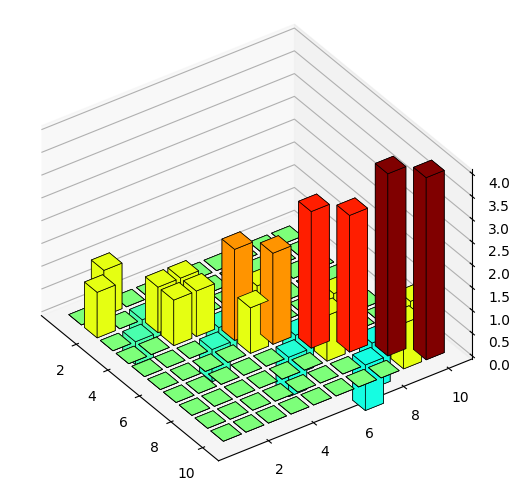

In [57]:
N = 5

a = tensor(destroy(N), qeye(2))
b = tensor(qeye(N), destroy(2))
sx = tensor(qeye(N), sigmax())

H = a.dag()*a+sx-0.5*(a*b.dag()+a.dag()*b)
#H = (a.dag()*a+1/2)


fig,ax = matrix_histogram(H,limits=[-4,4])
ax.view_init(azim=-50,elev=45)
plt.show()

In [ ]:
rho = 1/2*fock(2,0)*fock(2,0).dag()+1/2*fock(2,0)*fock(2,1).dag()+1/2*fock(2,1)*fock(2,0).dag()+1/2*fock(2,1)*fock(2,1).dag()
rho

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]

In [ ]:
(rho**2).tr()

1.0

----------
<h1>Estado de Wener</h1>

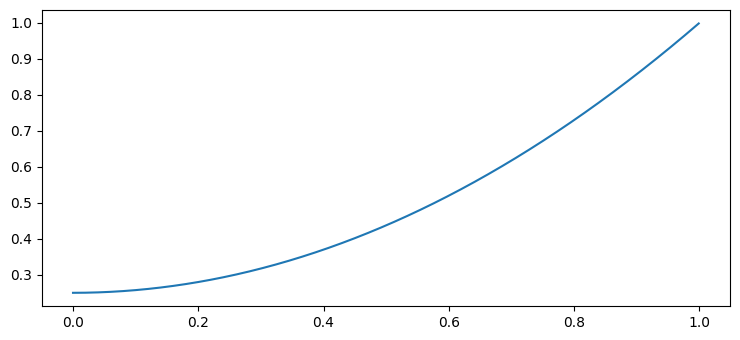

In [ ]:
N = 40
rho = []
pureza = []
psiminus = 1/np.sqrt(2)*(tensor(fock(2,0),fock(2,1))-tensor(fock(2,1), fock(2,0)))


p = np.arange(0,1,0.001)

for k in range(len(p)):
    rho.append(p[k]*psiminus*psiminus.dag()+(1-p[k])/4*tensor(identity(2), identity(2)))
    pureza.append((rho[k]**2).tr())


plt.plot(p, pureza)
plt.show()

In [ ]:
rhoA = []
rhoB = []

for k in range(len(rho)):
    rhoA.append(rho[k].ptrace(0))
    rhoB.append(rho[k].ptrace(1))

In [ ]:
K = []

for k in range(len(p)):
    K.append(expect(tensor(sigmay(), sigmay()),p[k]*psiminus*psiminus.dag()+(1-p[k])/4*tensor(identity(2), identity(2)))-expect(sigmay(),rhoA[k])*expect(sigmay(),rhoB[k]))

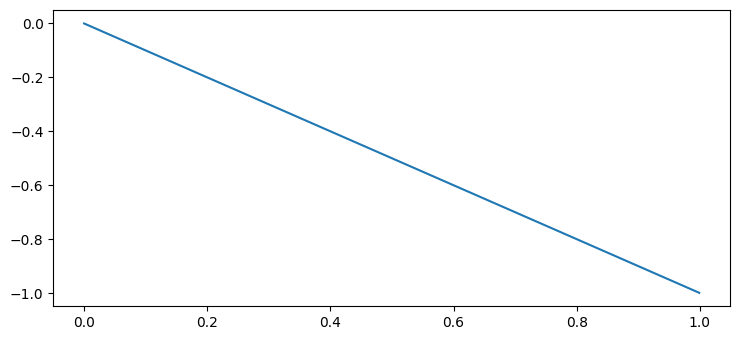

In [ ]:
plt.plot(p,K)

--------
<h1>Aniquilación Electrón-Positrón</h1>

In [ ]:
sigmaASigmaB = tensor(sigmax(),sigmax())+tensor(sigmay(),sigmay())+tensor(sigmaz(),sigmaz())
rhoAB = 1/4*(tensor(identity(2),identity(2))-sigmaASigmaB)

In [ ]:
pureza = (rhoAB**2).tr()
pureza

1.0

In [ ]:
pA = rhoAB.ptrace(1)
pB = rhoAB.ptrace(0)

In [ ]:
Pa = (pA*sigmaASigmaB.ptrace(1)).tr()
Pa

0.0

In [ ]:
Pb = (pB*sigmaASigmaB.ptrace(0)).tr()
Pb

0.0

---------
<h1>Rotación de la polarización de un cristal</h1>

In [ ]:
E0 = 1
hbar = 1
H = 1/np.sqrt(2)*Qobj([[0,-1j*E0],[1j*E0,0]])

H.eigenstates()[1][1]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70710678+0.j        ]
 [ 0.        -0.70710678j]]

In [ ]:
1/np.sqrt(2)

0.7071067811865475

In [ ]:
H*Qobj([[-1/np.sqrt(2)],[1j/np.sqrt(2)]])

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.5+0.j ]
 [0. -0.5j]]

-----------

Text(0.5, 0, '$t$')

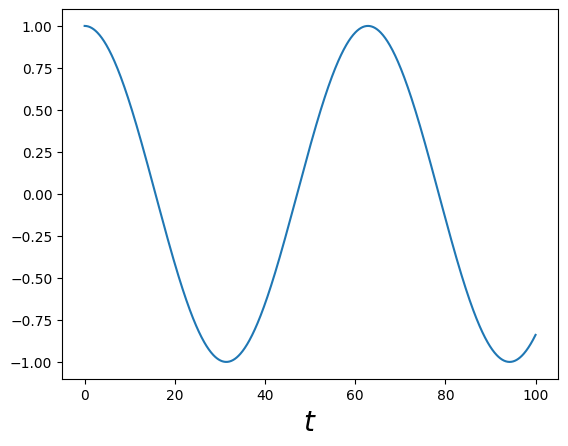

In [ ]:
w = 0.05
H = w*sigmaz()

psi0 = 1/np.sqrt(2)*(fock(2,0)+fock(2,1))

tlist = np.linspace(0, 100, 1000)
result = mesolve(H, psi0, tlist, [], [])


fig, axes = plt.subplots(1, 1)
axes.plot(tlist, expect(sigmax(), result.states))
axes.set_xlabel(r"$t$", fontsize=20)

In [ ]:
estados = result.states
Estados = []

for k in range(len(estados)):
    Estados.append(psi0.overlap(estados[k]))

In [ ]:
Prob = []
for k in range(len(Estados)):
    Prob.append(np.abs(Estados[k])**2)

1000

1000

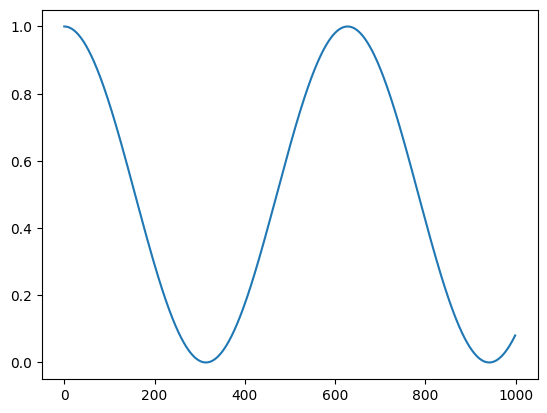

In [ ]:
t = np.arange(0,1000,1)
plt.plot(t,Prob)

len(t)

Text(0.5, 0, '$t$')

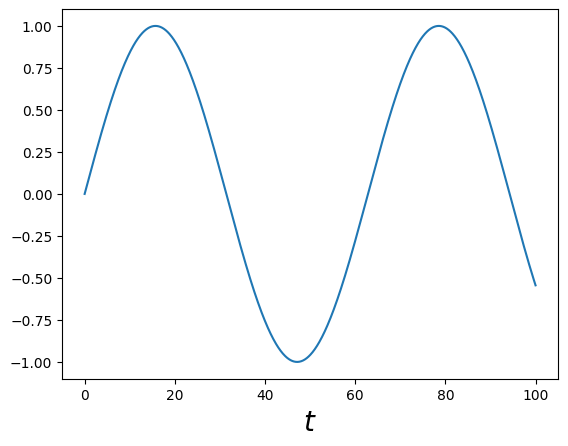

In [ ]:
fig, axes = plt.subplots(1, 1)
axes.plot(tlist, expect(sigmay(), result.states))
axes.set_xlabel(r"$t$", fontsize=20)

----------
<h1>Interacción Spin-Spin</h1>

Text(0.5, 0, '$t$')

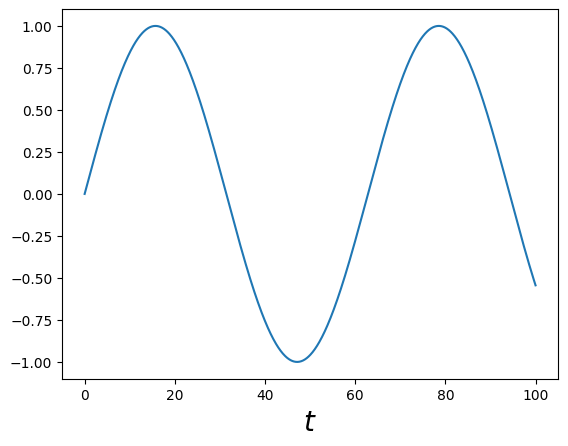

In [ ]:
J = 1

H = J*tensor(sigmaz(),sigmaz())

psi0 = 1/np.sqrt(2)*tensor((fock(2,0)+fock(2,1)),(fock(2,0)+fock(2,1)))

fig, axes = plt.subplots(1, 1)
axes.plot(tlist, expect(sigmay(), result.states))
axes.set_xlabel(r"$t$", fontsize=20)

In [ ]:
H.matrix_element(basis(2,0).dag(),basis(2,0))

(1+0j)

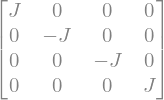

In [ ]:
from sympy import *
init_printing(use_unicode=True)

J = symbols("J", real = True)
Hamiltonian = Matrix([[J,0,0,0],[0,-J,0,0],[0,0,-J,0],[0,0,0,J]])
Hamiltonian

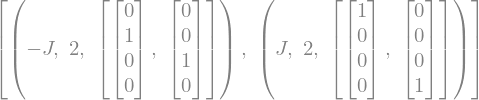

In [ ]:
Hamiltonian.eigenvects()

In [ ]:
theta = pi/2
sin(theta/2)

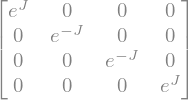

In [ ]:
exp(Hamiltonian)

In [ ]:
exp(1j*pi/4)

In [ ]:
np.exp(-1j*np.pi/4)

(0.7071067811865476-0.7071067811865476j)

------

In [ ]:
N = 2
a = destroy(N)
hbar = 1
w = 1

H0 = hbar*w*(a.dag()*a+1/2)
t = np.arange(0,10,0.1)


psi0 = []
for k in range(len(t)):
    psi0.append(coherent(N,np.exp(-t[k]**2)))
H1 = position(N)

def H1_coeff(t, args):
    G0 = 1
    wq = 1
    return G0*np.sin(wq*t)

In [ ]:
H = [H0, [H1, H1_coeff]]

result = []
for k in range(len(psi0)):
    result.append(mesolve(H, psi0[k], t, [sigmax()]))

In [ ]:
fig, axes = plt.subplots(1, 1)
for k in range(len(result)):
    axes.plot(t, expect(position(N), result[k].states))
    axes.set_xlabel(r"$t$", fontsize=20)
    axes.set_ylabel(r"$\left<x\right>_{|\psi_0\rangle}$", fontsize=20);

----------

<h1>Hamiltoniano t-dependiente</h1>

In [ ]:
# Basic setup
import numpy as np
import qutip

size = 4
t = 1.0
a = qutip.destroy(size)
ad = qutip.create(size)
n = qutip.num(size)
Id = qutip.qeye(size)

Defino el Hamiltoniano, que es $a^\dagger a+(a+a^\dagger)cos(t)$

In [ ]:
def cos_t(t,args):
    return np.cos(t)

function_form = qutip.QobjEvo([n, [a + ad, cos_t]])

Meto todas las matrices en un array de matrices

In [ ]:
N = 100
matrices = []

for k in range(N):
    matrices.append(function_form(k))

matrices[4]

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.         -0.65364362  0.          0.        ]
 [-0.65364362  1.         -0.92439167  0.        ]
 [ 0.         -0.92439167  2.         -1.13214396]
 [ 0.          0.         -1.13214396  3.        ]]

AttributeError: 'Axes3D' object has no attribute 'w_xaxis'

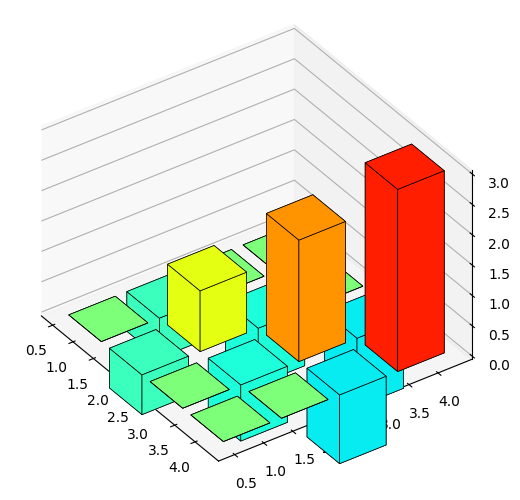

In [ ]:
fig,ax = matrix_histogram(matrices[4],limits=[-4,4])
ax.view_init(azim=-50,elev=45)
plt.show()